In [3]:
#loading in the data that will be needed as well as the python libraries that will be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cleaned_data.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


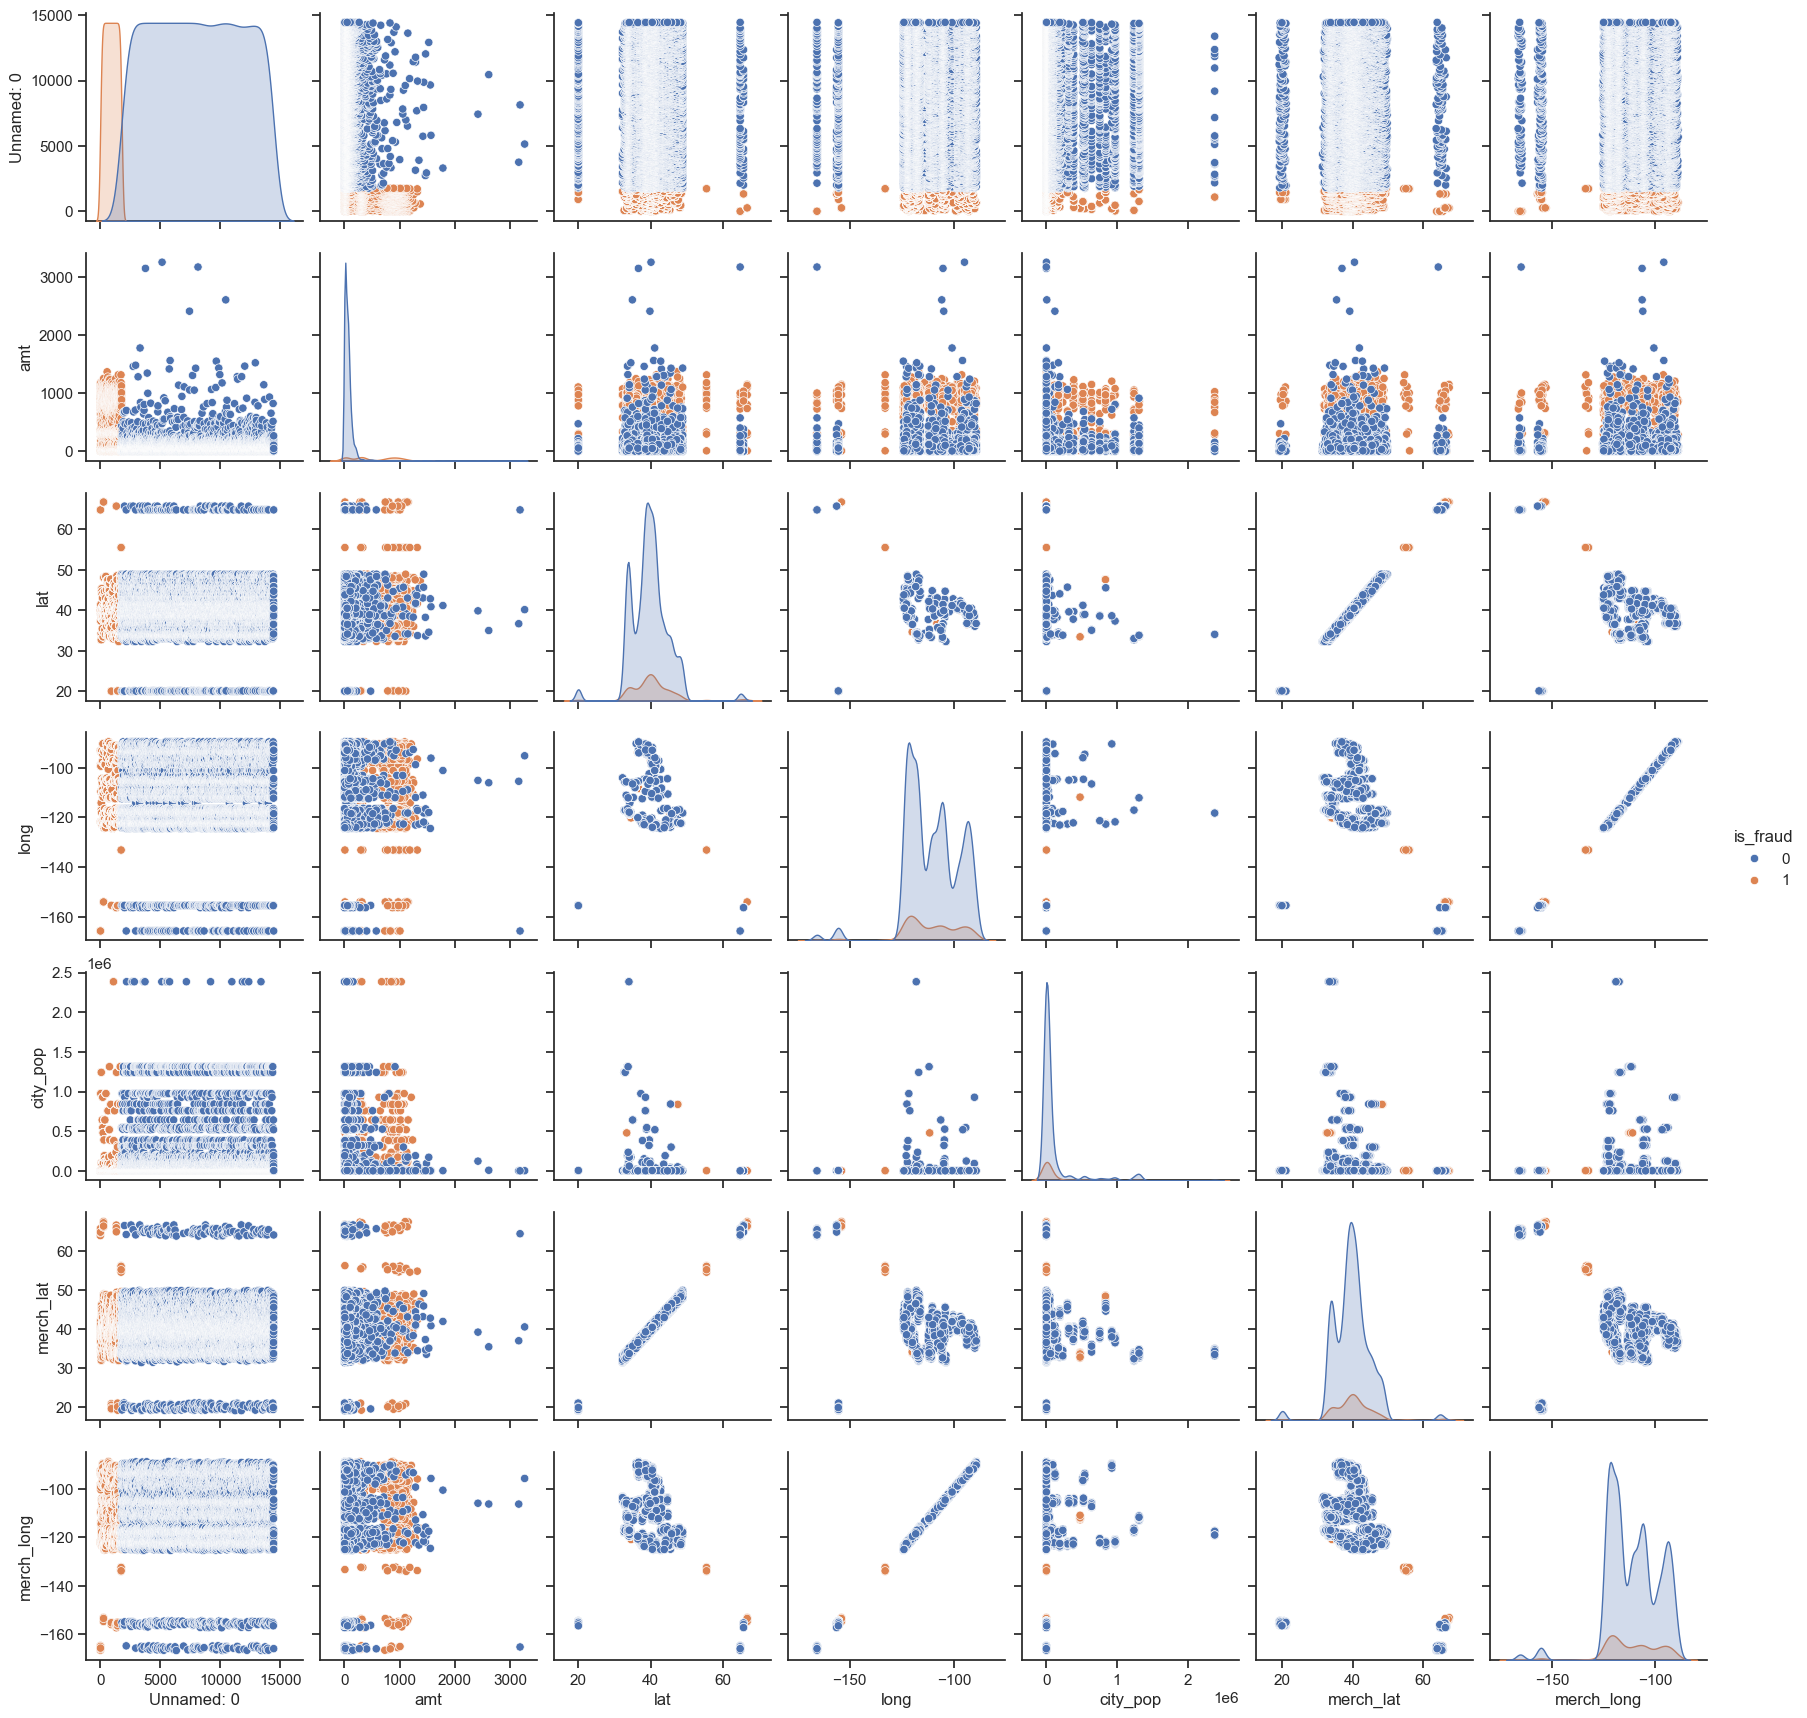

In [4]:
#creating the pairplot to see how some of the features interact with eachother
sns.set_theme(style="ticks")
sns.pairplot(data, hue="is_fraud")

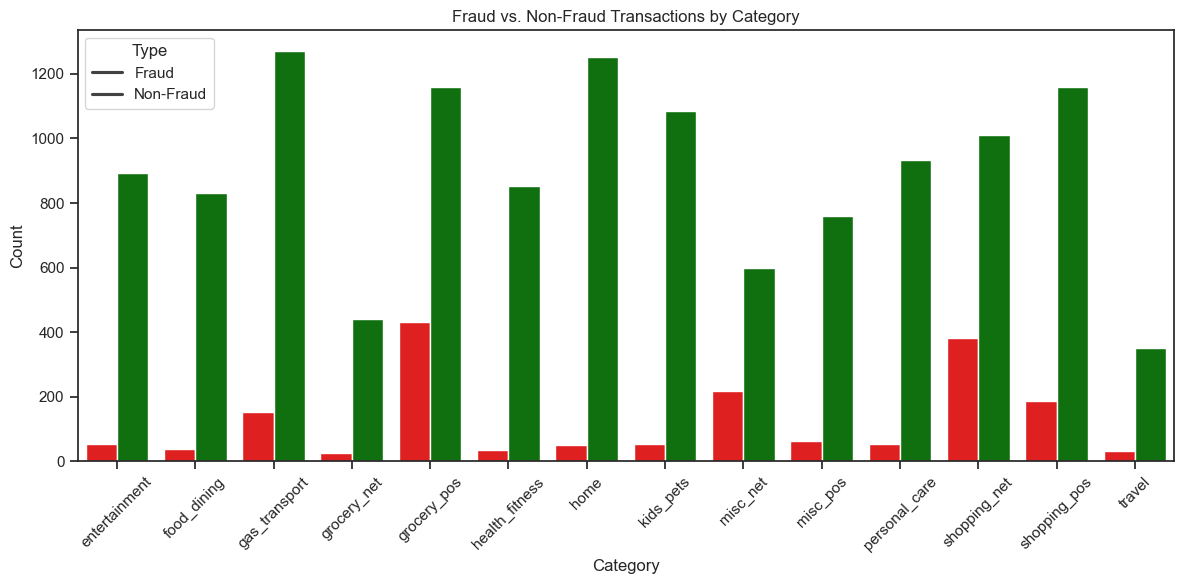

In [9]:
#creating a new dataframe that keeps the category and is_fraud together for easier graphing
fraud_stats = data.groupby('category')['is_fraud'].agg(
    fraud_count=lambda x: (x == 1).sum(),
    non_fraud_count=lambda x: (x == 0).sum()
).reset_index()

#print(fraud_stats)

# Reshape data for seaborn (convert to long format)
melted = fraud_stats.melt(id_vars='category', 
                          value_vars=['fraud_count', 'non_fraud_count'],
                          var_name='type', 
                          value_name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='category', y='count', hue='type', 
            palette={'fraud_count': 'red', 'non_fraud_count': 'green'})

plt.title('Fraud vs. Non-Fraud Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

                          city  fraud_count  non_fraud_count
0                  Albuquerque           24               57
1                      Altonah           14              104
2                         Alva            9               50
3                American Fork            8               47
4                       Angwin           10                0
..                         ...          ...              ...
171                    Westfir           12               35
172                    Wheaton            0              115
173               Williamsburg           13               22
174                Woods Cross            0               22
175  Yellowstone National Park           12               14

[176 rows x 3 columns]


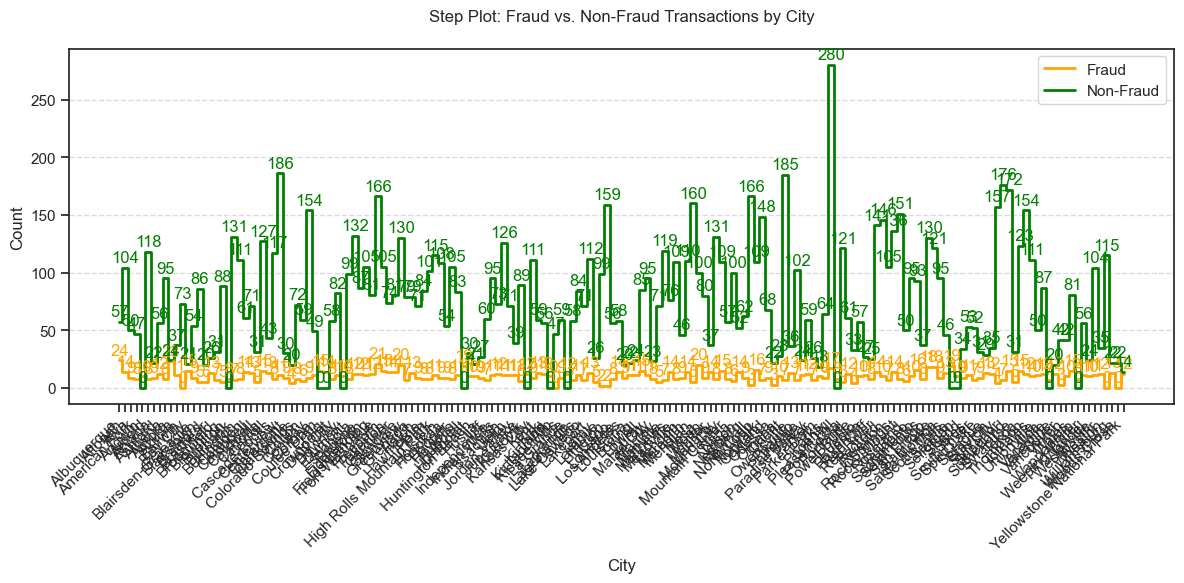

In [6]:
#creating the same data frame but about city rather than category
fraud_stats = data.groupby('city')['is_fraud'].agg(
    fraud_count=lambda x: (x == 1).sum(),
    non_fraud_count=lambda x: (x == 0).sum()
).reset_index()

print(fraud_stats)


cities = fraud_stats['city']
fraud = fraud_stats['fraud_count']
non_fraud = fraud_stats['non_fraud_count']

# Create the step plot
plt.figure(figsize=(12, 6))

# Plot fraud and non-fraud as step lines
plt.step(cities, fraud, where='mid', label='Fraud', color='orange', linewidth=2)
plt.step(cities, non_fraud, where='mid', label='Non-Fraud', color='green', linewidth=2)

# Customize the plot
plt.title('Step Plot: Fraud vs. Non-Fraud Transactions by City', pad=20)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels (optional)
for i, (f, nf) in enumerate(zip(fraud, non_fraud)):
    plt.text(i, f + 5, f'{f:,}', ha='center', color='orange')  # Fraud labels
    plt.text(i, nf + 5, f'{nf:,}', ha='center', color='green')  # Non-fraud labels

plt.tight_layout()
plt.show()

#there is clearly a better way of doing this
#pick the top 10/15 cities with most fraud and show them and maybe also do least fraudulent cities idk


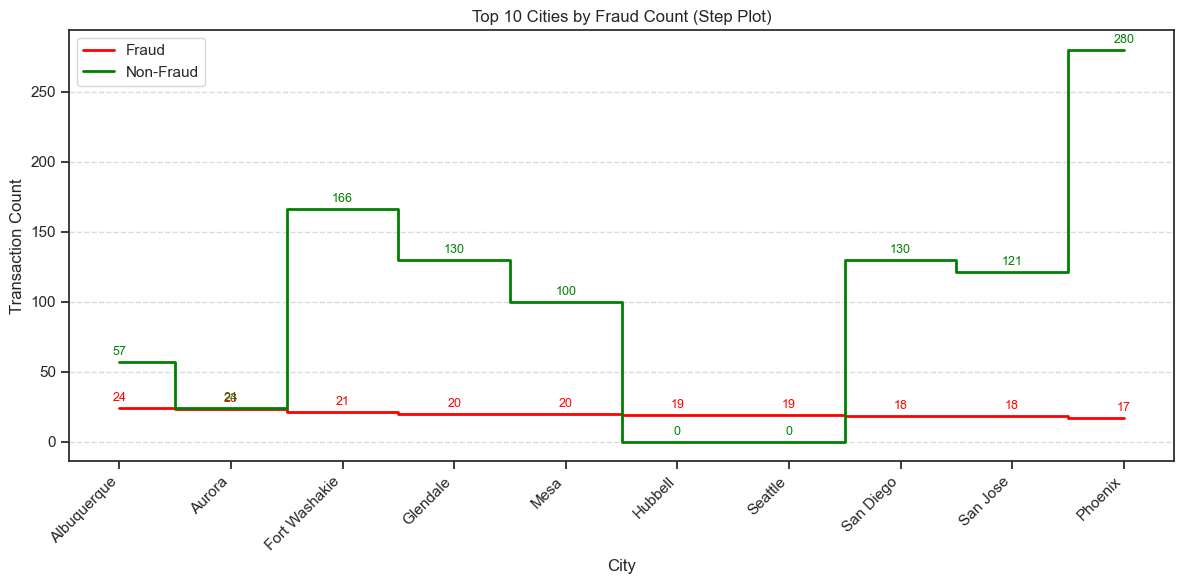

In [8]:
#using the dataframe that was previously made and sorting based on is_fraud and taking the top 10 cities
fraud_stats_sorted = fraud_stats.sort_values('fraud_count', ascending=False)


top_n = 10  # Plot top N cities
cities = fraud_stats_sorted['city'].head(top_n)
fraud = fraud_stats_sorted['fraud_count'].head(top_n)
non_fraud = fraud_stats_sorted['non_fraud_count'].head(top_n)

# Step Plot
plt.figure(figsize=(12, 6))
plt.step(cities, fraud, where='mid', label='Fraud', color='red', linewidth=2)
plt.step(cities, non_fraud, where='mid', label='Non-Fraud', color='green', linewidth=2)

# Customize
plt.title(f'Top {top_n} Cities by Fraud Count (Step Plot)')
plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels (optional)
for i, (f, nf) in enumerate(zip(fraud, non_fraud)):
    plt.text(i, f + 5, f'{f}', ha='center', color='red', fontsize=9)
    plt.text(i, nf + 5, f'{nf}', ha='center', color='green', fontsize=9)

plt.tight_layout()
plt.show()

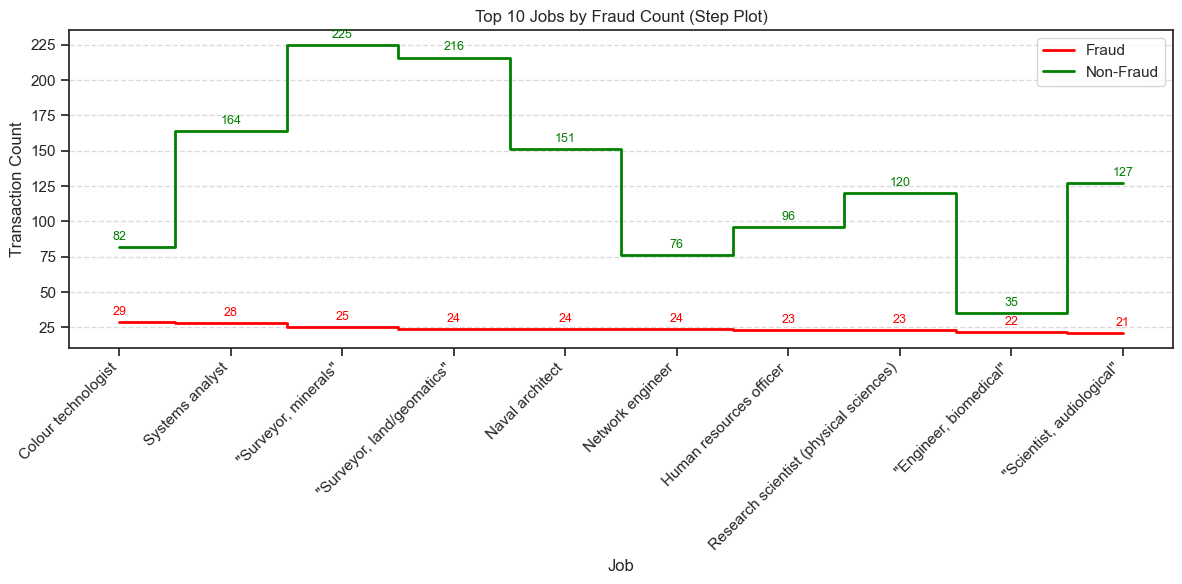

In [12]:
#the same process as last graph but with job instead of cities
fraud_stats = data.groupby('job')['is_fraud'].agg(
    fraud_count=lambda x: (x == 1).sum(),
    non_fraud_count=lambda x: (x == 0).sum()
).reset_index()


fraud_stats_sorted = fraud_stats.sort_values('fraud_count', ascending=False)


top_n = 10  # Plot top N cities
cities = fraud_stats_sorted['job'].head(top_n)
fraud = fraud_stats_sorted['fraud_count'].head(top_n)
non_fraud = fraud_stats_sorted['non_fraud_count'].head(top_n)

# Step Plot
plt.figure(figsize=(12, 6))
plt.step(cities, fraud, where='mid', label='Fraud', color='red', linewidth=2)
plt.step(cities, non_fraud, where='mid', label='Non-Fraud', color='green', linewidth=2)

# Customize
plt.title(f'Top {top_n} Jobs by Fraud Count (Step Plot)')
plt.xlabel('Job')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels (optional)
for i, (f, nf) in enumerate(zip(fraud, non_fraud)):
    plt.text(i, f + 5, f'{f}', ha='center', color='red', fontsize=9)
    plt.text(i, nf + 5, f'{nf}', ha='center', color='green', fontsize=9)

plt.tight_layout()
plt.show()